# Feedforward Neural Network Implementation with Keras and TensorFlow: CIFAR-10 Dataset
This Jupyter notebook demonstrates the implementation of a feedforward neural network using Keras and TensorFlow. The goal of this assignment is to walk through the process of building, training, and evaluating a neural network for image classification. We will use the MNIST or CIFAR-10 dataset as per your choice.<br>
Dataset: https://www.cs.toronto.edu/%7Ekriz/cifar.html <br>
Info: The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

## Assignment Steps:

**a. Import the necessary packages**: We will start by importing the required Python libraries, including Keras, TensorFlow, and other essential packages.

**b. Load the training and testing data**: In this step, we will load the dataset (either MNIST or CIFAR-10) for training and testing the neural network.

**c. Define the network architecture using Keras**: Here, we will define the architecture of our feedforward neural network, specifying the number of layers, neurons, and activation functions.

**d. Train the model using SGD (Stochastic Gradient Descent)**: We will use the Stochastic Gradient Descent optimizer to train the neural network on the training data.

**e. Evaluate the network**: After training, we will evaluate the performance of the model on the testing data to assess its accuracy and other relevant metrics.

**f. Plot the training loss and accuracy**: We will create plots to visualize the training loss and accuracy over epochs, providing insights into the model's learning progress.

Feel free to follow along with the code and explanations provided in this notebook to gain a better understanding of building and training neural networks for image classification.

# Build the Image classification model by dividing the model into following 4 stages:
a. Loading and preprocessing the image data<br>
b. Defining the model’s architecture<br>
c. Training the model<br>
d. Estimating the model’s performance<br>

Note: Both assignment can use this code accordingly

In [1]:
# !pip install tensorflow matplotlib
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
cifar10 = tf.keras.datasets.cifar10 # Importing cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # Splitting it into training and testing data

for i in (x_train, y_train, x_test, y_test):
  print(i.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


[6]


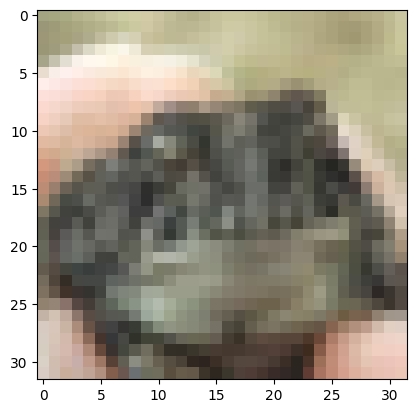

In [3]:
plt.imshow(x_train[25])
print(y_train[25])
plt.show()

In [4]:
#scaling the values
x_train = x_train/255
x_test = x_test/255
# 0/255 = 255
#255/255 = 1 maximum value

In [5]:
print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [6]:
num_classes = 10
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [7]:
# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [8]:
print(y_train.shape, y_test.shape)


(50000, 10) (10000, 10)


In [9]:
from tensorflow import keras

# Create a sequential model
model = keras.Sequential()

# Convolutional layers
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

# Fully connected layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))  # 10 classes for classification

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to check the architecture
model.summary()


c:\Users\rudra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Training the model
history = model.fit(x_train, y_train,
              batch_size=30,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.1909 - loss: 2.1716 - val_accuracy: 0.3656 - val_loss: 1.7700
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.3830 - loss: 1.7041 - val_accuracy: 0.4329 - val_loss: 1.5491
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4619 - loss: 1.4914 - val_accuracy: 0.4876 - val_loss: 1.4113
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5129 - loss: 1.3679 - val_accuracy: 0.5207 - val_loss: 1.3340
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5471 - loss: 1.2727 - val_accuracy: 0.5658 - val_loss: 1.2159
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5795 - loss: 1.1973 - val_accuracy: 0.5920 - val_loss: 1.1551
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6000 - loss: 1.1359 - val_accuracy: 0.6030 - val_loss: 1.1150
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6268 - loss: 1

<Axes: >

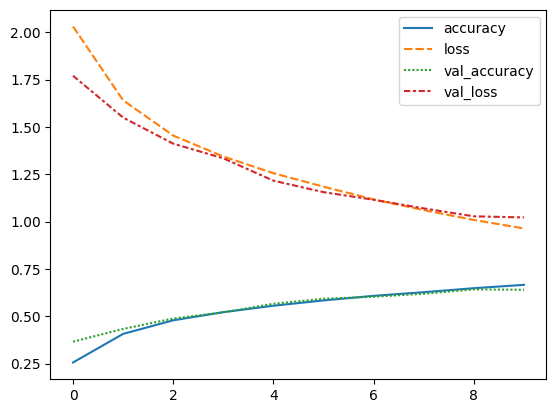

In [11]:
import seaborn as sns
sns.lineplot(model.history.history)

### Alternative Plot below for more details

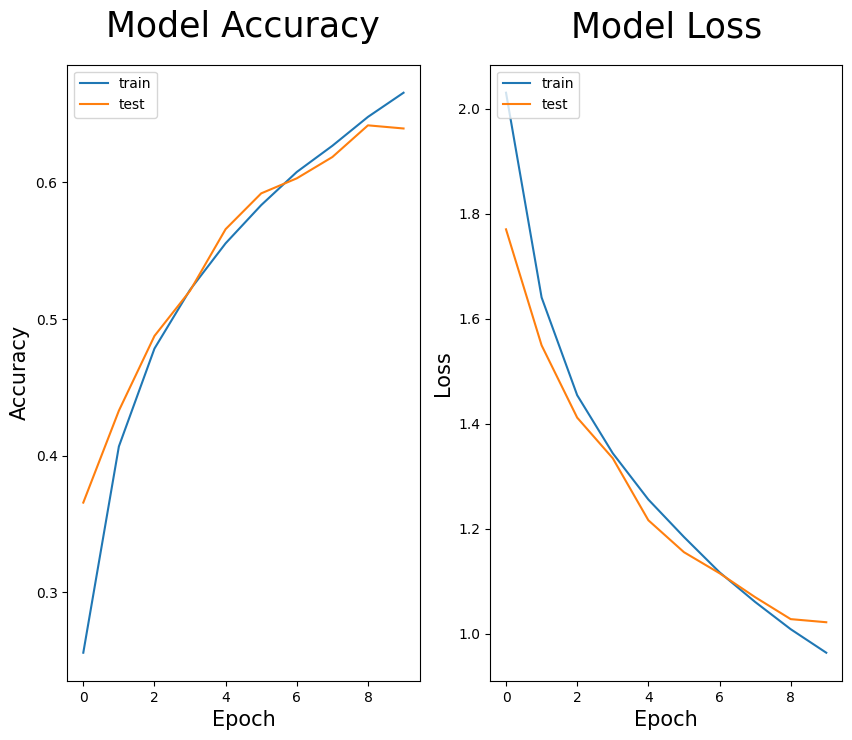

In [12]:
# Plotting the Model Accuracy & Model Loss vs Epochs
plt.figure(figsize=[10,8])

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')


# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluation

In [13]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [14]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

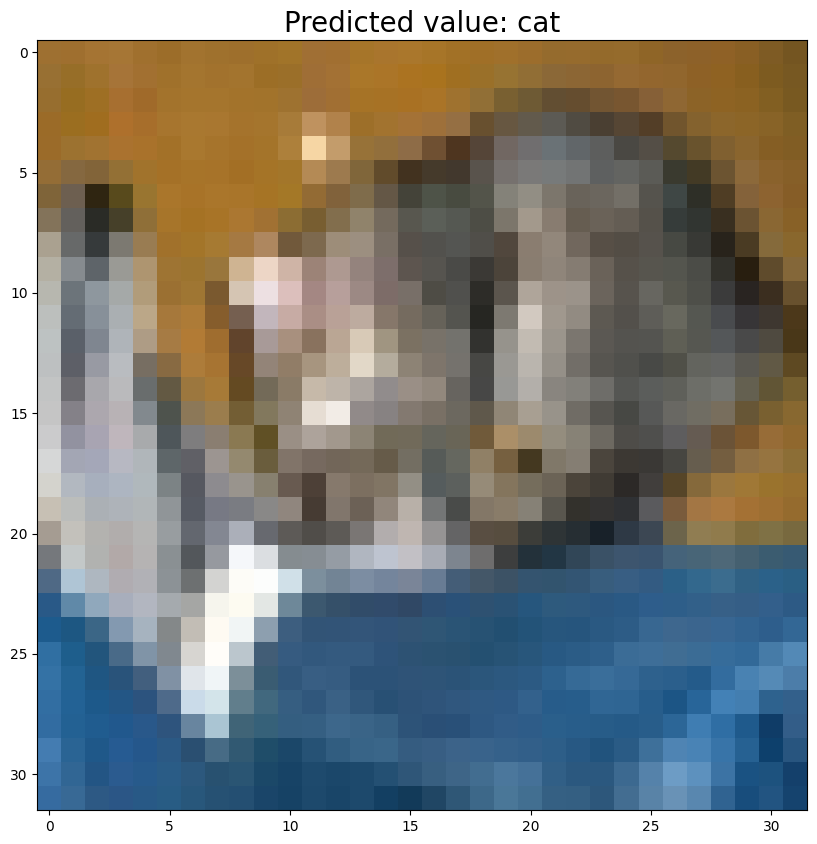

In [15]:
plt.figure(figsize=[10,10])
plt.imshow(x_test[0].reshape(32, 32, -1))
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[0], axis=0)]), size=20)
plt.grid(False)

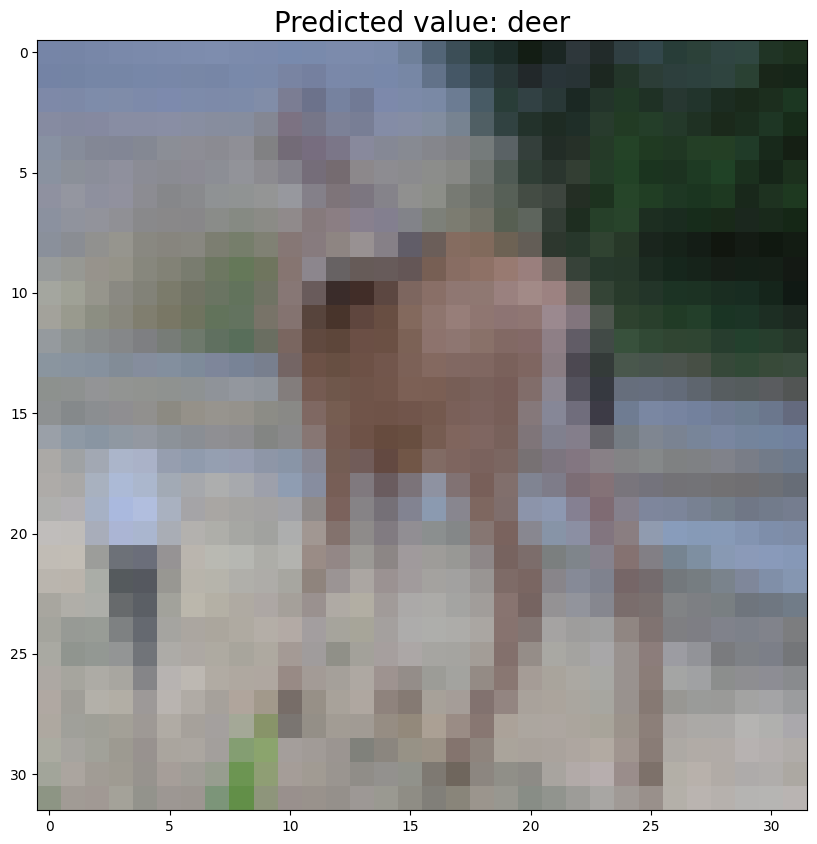

In [16]:
plt.figure(figsize=[10,10])
plt.imshow(x_test[100].reshape(32, 32, -1))
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[100], axis=0)]), size=20)
plt.grid(False)